Loading images from ./data/image_data/DataSet_STO...


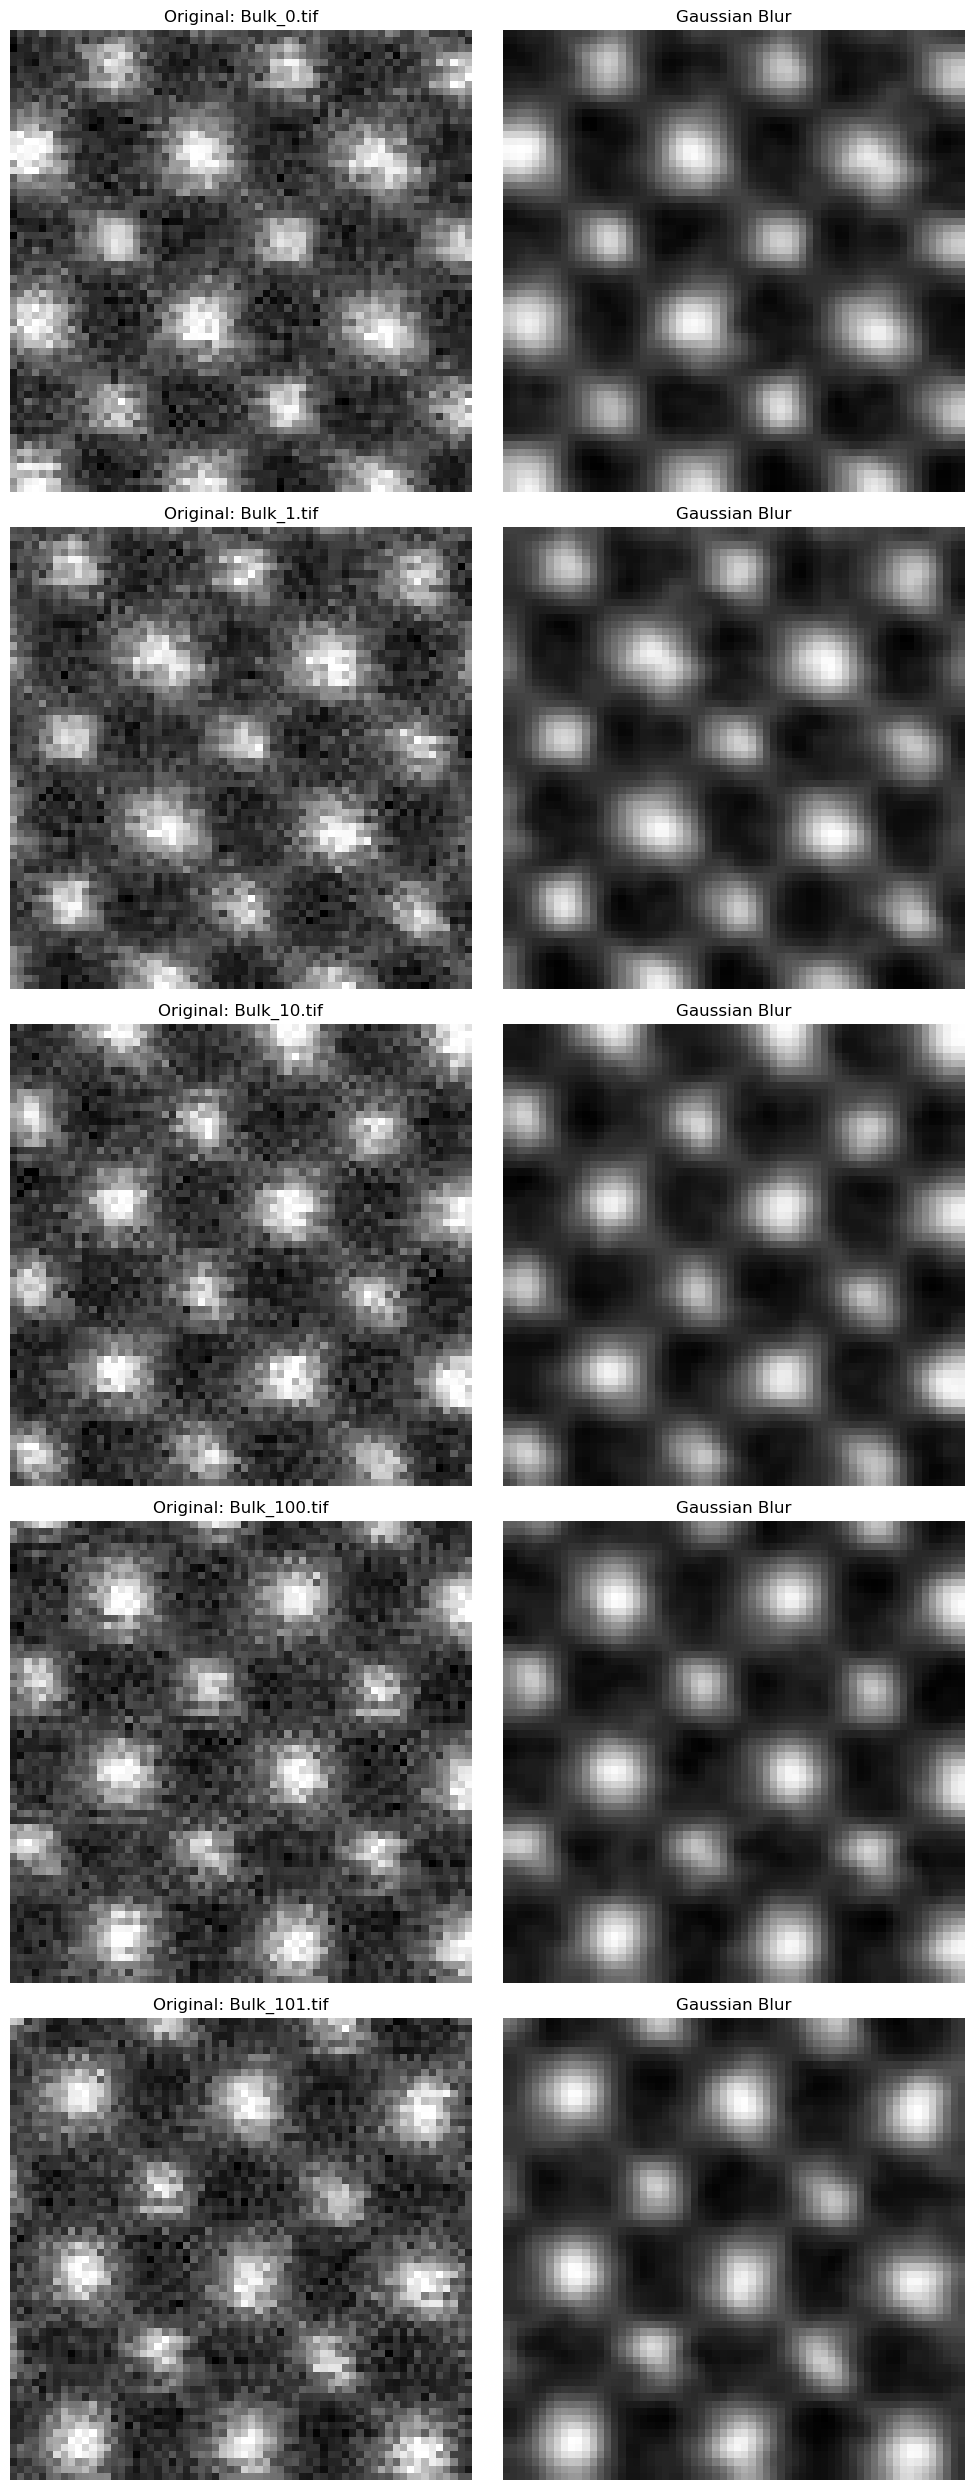

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import cv2

DATASET_PATH = './data/image_data/DataSet_STO' # Default fallback

# Function to load images
def load_images(path, extension='tif', limit=5):
    # Ensure path is valid before globbing
    if not os.path.exists(path):
        print(f"Error: Path {path} does not exist.")
        return [], []
        
    search_pattern = os.path.join(path, f'*.{extension}')
    files = sorted(glob.glob(search_pattern))
    
    if not files:
        print(f"Warning: No files found matching {search_pattern}")
    
    images = []
    names = []
    for f in files[:limit]:
        try:
            img = tiff.imread(f)
            images.append(img)
            names.append(os.path.basename(f))
        except Exception as e:
            print(f"Error reading {f}: {e}")
    return images, names

# Preprocessing pipeline
def preprocess_pipeline(image):
    results = {}
    results['original'] = image
    
    # 1. Normalization (Min-Max) to 0-255 for OpenCV compatibility
    if np.max(image) == np.min(image):
        img_norm = np.zeros_like(image, dtype=np.uint8)
    else:
        img_norm = (image - np.min(image)) / (np.max(image) - np.min(image))
        img_norm = (img_norm * 255).astype(np.uint8)
    
    # 2. Gaussian Blurring (Denoising)
    # Kernel size (5,5) and sigma 0 (autocalculated)
    gaussian = cv2.GaussianBlur(img_norm, (5, 5), 0)
    results['gaussian'] = gaussian
    
    return results

# Visualization
def visualize_results(images, names):
    n = len(images)
    if n == 0:
        print("No images found to visualize.")
        return

    # 3 columns: Original, Gaussian, CLAHE
    plt.figure(figsize=(15, 5 * n))
    
    for i, img in enumerate(images):
        processed = preprocess_pipeline(img)
        
        # Original
        plt.subplot(n, 3, 3*i + 1)
        plt.imshow(processed['original'], cmap='gray')
        plt.title(f"Original: {names[i]}")
        plt.axis('off')
        
        # Gaussian
        plt.subplot(n, 3, 3*i + 2)
        plt.imshow(processed['gaussian'], cmap='gray')
        plt.title("Gaussian Blur")
        plt.axis('off')

    
    plt.tight_layout()
    plt.show()

# Main execution
if os.path.exists(DATASET_PATH):
    print(f"Loading images from {DATASET_PATH}...")
    imgs, fnames = load_images(DATASET_PATH, limit=5)
    visualize_results(imgs, fnames)
else:
    print(f"Dataset folder '{DATASET_PATH}' not found.")
    


Loading images from ./data/image_data/DataSet_CdTe...


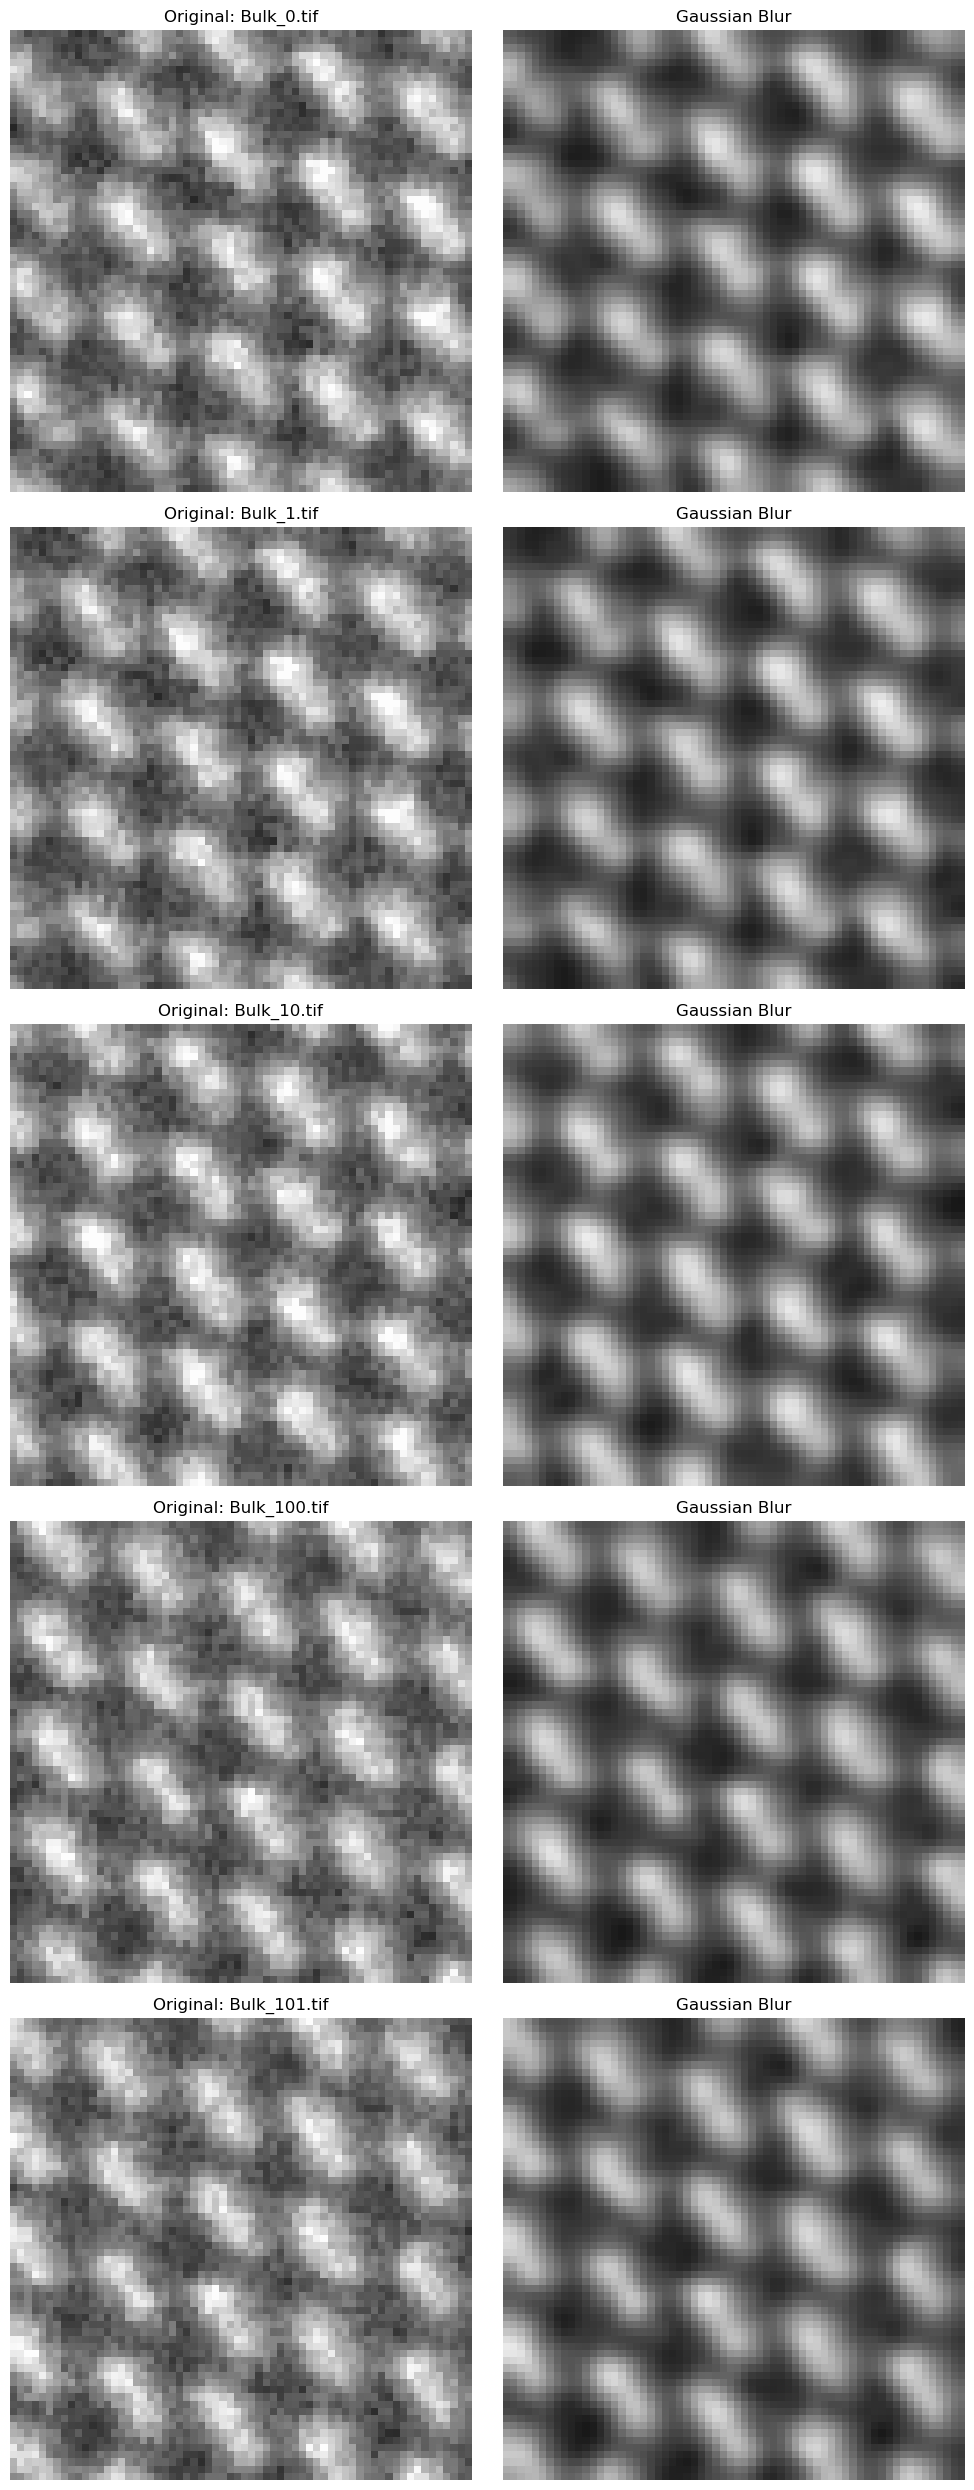

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import cv2

DATASET_PATH = './data/image_data/DataSet_CdTe' # Default fallback

# Function to load images
def load_images(path, extension='tif', limit=5):
    # Ensure path is valid before globbing
    if not os.path.exists(path):
        print(f"Error: Path {path} does not exist.")
        return [], []
        
    search_pattern = os.path.join(path, f'*.{extension}')
    files = sorted(glob.glob(search_pattern))
    
    if not files:
        print(f"Warning: No files found matching {search_pattern}")
    
    images = []
    names = []
    for f in files[:limit]:
        try:
            img = tiff.imread(f)
            images.append(img)
            names.append(os.path.basename(f))
        except Exception as e:
            print(f"Error reading {f}: {e}")
    return images, names

# Preprocessing pipeline
def preprocess_pipeline(image):
    results = {}
    results['original'] = image
    
    # 1. Normalization (Min-Max) to 0-255 for OpenCV compatibility
    if np.max(image) == np.min(image):
        img_norm = np.zeros_like(image, dtype=np.uint8)
    else:
        img_norm = (image - np.min(image)) / (np.max(image) - np.min(image))
        img_norm = (img_norm * 255).astype(np.uint8)
    
    # 2. Gaussian Blurring (Denoising)
    # Kernel size (5,5) and sigma 0 (autocalculated)
    gaussian = cv2.GaussianBlur(img_norm, (5, 5), 0)
    results['gaussian'] = gaussian
    
    return results

# Visualization
def visualize_results(images, names):
    n = len(images)
    if n == 0:
        print("No images found to visualize.")
        return

    # 3 columns: Original, Gaussian, CLAHE
    plt.figure(figsize=(15, 5 * n))
    
    for i, img in enumerate(images):
        processed = preprocess_pipeline(img)
        
        # Original
        plt.subplot(n, 3, 3*i + 1)
        plt.imshow(processed['original'], cmap='gray')
        plt.title(f"Original: {names[i]}")
        plt.axis('off')
        
        # Gaussian
        plt.subplot(n, 3, 3*i + 2)
        plt.imshow(processed['gaussian'], cmap='gray')
        plt.title("Gaussian Blur")
        plt.axis('off')

    
    plt.tight_layout()
    plt.show()

# Main execution
if os.path.exists(DATASET_PATH):
    print(f"Loading images from {DATASET_PATH}...")
    imgs, fnames = load_images(DATASET_PATH, limit=5)
    visualize_results(imgs, fnames)
else:
    print(f"Dataset folder '{DATASET_PATH}' not found.")
    
